In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# ３枚の画像ファイルを読み込む
img_fn = ["imgs/hdr-1.jpg", "imgs/hdr-2.jpg", "imgs/hdr-3.jpg"]
img_list = [cv2.imread(fn) for fn in img_fn]

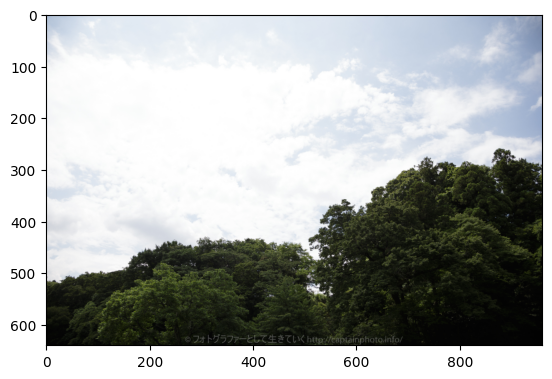

In [80]:
img_list[0] = cv2.resize(img_list[0], (960, 640))
plt.imshow(cv2.cvtColor(img_list[0], cv2.COLOR_BGR2RGB))

#OpenCVの関数imread()で画像ファイルを読み込むと色の順番がBGR（青、緑、赤）になる、
#一方、pyplot や　PIL(Pillowで)は色の順番はRGB（赤、緑、青）を前提としている。そのため、RとBを交換する必要

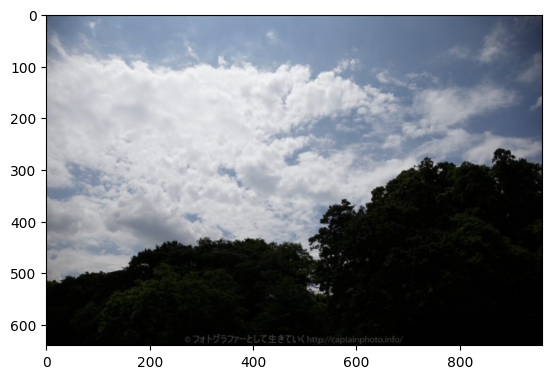

In [81]:
img_list[1] = cv2.resize(img_list[1], (960, 640))
plt.imshow(cv2.cvtColor(img_list[1], cv2.COLOR_BGR2RGB))

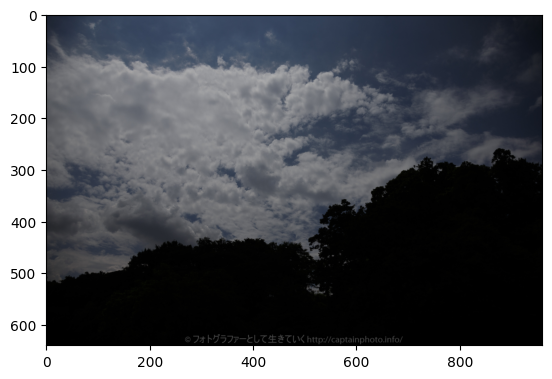

In [82]:
img_list[2] = cv2.resize(img_list[2], (960, 640))
plt.imshow(cv2.cvtColor(img_list[2], cv2.COLOR_BGR2RGB))

In [74]:
# ３枚の画像に対して露出時間をセット 
exposure_times = np.array([15, 5, 3], dtype=np.float32)

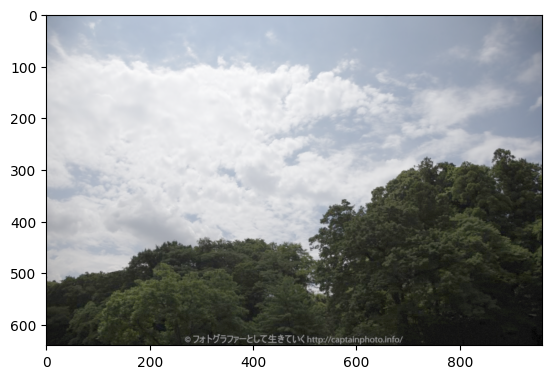

In [86]:
hdr_image_simple = np.zeros((640,960,3), np.float32)

#画素ごとに合成
for i in range(len(img_list)):
    hdr_image_simple += img_list[i]/ exposure_times[i]

tonemap0 = cv2.createTonemap(gamma=2.2)
hdr_image_simple = tonemap0.process(hdr_image_simple.copy())

# 8ビットデータに変換
hdr_image_8bit = np.clip(hdr_image_simple*255, 0, 255).astype('uint8')
plt.imshow(cv2.cvtColor(hdr_image_8bit, cv2.COLOR_BGR2RGB))

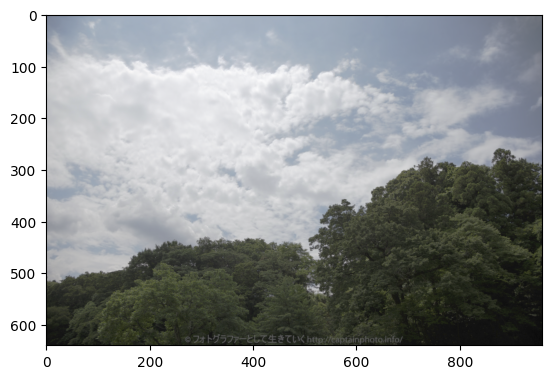

In [89]:

# ロバートソン(Robertson)法によるHDR合成
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())
tonemap2 = cv2.createTonemap(gamma=2.2)
res_robertson = tonemap2.process(hdr_robertson.copy())

# 8ビットデータに変換
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
plt.imshow(cv2.cvtColor(res_robertson_8bit, cv2.COLOR_BGR2RGB))

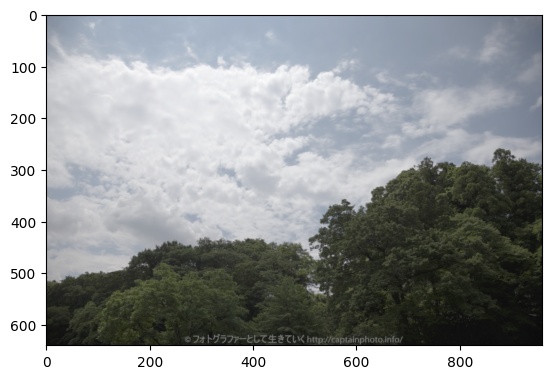

In [90]:
#ライブラリを使ってHDR合成してみる

# デベヴェック（Debevec）法によるHDR合成
merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(img_list, times=exposure_times.copy())
tonemap1 = cv2.createTonemap(gamma=2.2)
res_debvec = tonemap1.process(hdr_debvec.copy())

# 8ビットデータに変換
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')
plt.imshow(cv2.cvtColor(res_debvec_8bit, cv2.COLOR_BGR2RGB))

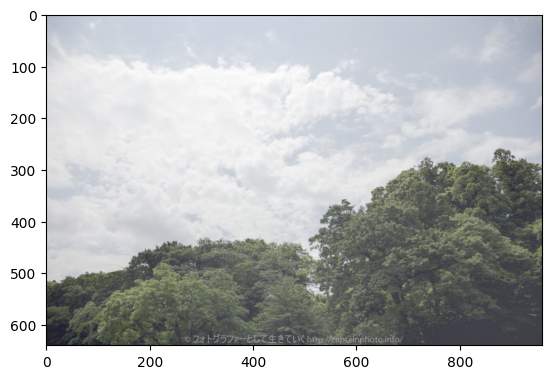

In [91]:

# メルテンス（Mertens）法によるHDR合成
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
tonemap2 = cv2.createTonemap(gamma=2.2)
res_mertens = tonemap2.process(res_mertens.copy())

# 8ビットデータに変換
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.imshow(cv2.cvtColor(res_mertens_8bit, cv2.COLOR_BGR2RGB))
